<a href="https://colab.research.google.com/github/Twixx10/MachineLearningTASK/blob/main/Week3/01_Classification_Model_CreditDataset_M_Rakan_Bagus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Path ke file CSV
file_path = '/content/drive/MyDrive/Machine Learning/Dataset/CreditDataset.csv'

# Membaca file CSV
df = pd.read_csv(file_path)

In [28]:
# Tahap 1: Memuat Dataset
# Menampilkan beberapa baris pertama dari dataset untuk melihat strukturnya
print("Baris pertama dari dataset:")
print(df.head())

# Mengecek apakah ada nilai yang hilang (missing values) pada dataset
missing_values = df.isnull().sum()
print("\nNilai yang hilang pada setiap kolom:")
print(missing_values)

Baris pertama dari dataset:
    x1  x2   x3   x4    x5   x6   x7  x8   x9   x10  ...   x12 x13   x14  \
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
2  A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
3  A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
4  A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   

    x15 x16   x17 x18   x19   x20 Class  
0  A152   2  A173   1  A192  A201     1  
1  A152   1  A173   1  A191  A201     2  
2  A152   1  A172   2  A191  A201     1  
3  A153   1  A173   2  A191  A201     1  
4  A153   2  A173   2  A191  A201     2  

[5 rows x 21 columns]

Nilai yang hilang pada setiap kolom:
x1       0
x2       0
x3       0
x4       0
x5       0
x6       0
x7       0
x8       0
x9       0
x10      0
x11      0
x12      0
x13      0
x14      0
x15      0
x16      0
x17      0
x18      0
x19 

In [29]:
# Tahap 2: Data Preprocessing
# Memisahkan fitur dan target
# Fitur adalah semua kolom kecuali 'Class' (target), sedangkan target adalah kolom 'Class'
X = df.drop('Class', axis=1)  # 'X' adalah fitur
y = df['Class']  # 'y' adalah target

# Mengubah fitur kategori menjadi numerik menggunakan Label Encoding
# Hal ini dilakukan untuk fitur kategori agar bisa diproses oleh algoritma ML
categorical_columns = X.select_dtypes(include=['object']).columns  # Mendeteksi kolom kategori
label_encoders = {}  # Dictionary untuk menyimpan encoder tiap kolom
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Mengubah nilai kategori menjadi angka
    label_encoders[col] = le  # Menyimpan encoder untuk penggunaan di masa depan

# Normalisasi fitur numerik menggunakan StandardScaler
# Hal ini dilakukan agar semua fitur memiliki skala yang sama
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Menghasilkan array yang terstandarisasi

# Mengonversi target kelas dari {1, 2} menjadi {0, 1} agar kompatibel dengan ROC curve
# Mengasumsikan kelas 1 sebagai positif dan kelas 2 sebagai negatif
y_binary = y.replace({1: 1, 2: 0})  # Mengubah 2 menjadi 0

In [30]:
# Tahap 3: Split dataset menjadi data training dan testing
# Dataset dibagi menjadi 80% untuk training dan 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)


In [31]:
# Tahap 4: Membuat dan melatih model Decision Tree dengan max_depth
dt_model = DecisionTreeClassifier(max_depth=1, random_state=42)  # Mengatur max_depth menjadi 5
dt_model.fit(X_train, y_train)  # Melatih model menggunakan data training

# Tahap 4: Membuat dan melatih model k-NN
# Membuat instance dari KNeighborsClassifier dengan 5 tetangga (n_neighbors=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)  # Melatih model menggunakan data training

KNeighborsClassifier()

In [32]:
# Tahap 5: Evaluasi model dengan data testing
# Prediksi untuk model Decision Tree dengan target biner
dt_y_pred = dt_model.predict(X_test)  # Prediksi kelas menggunakan model Decision Tree
dt_accuracy = accuracy_score(y_test, dt_y_pred)  # Menghitung akurasi
dt_precision = precision_score(y_test, dt_y_pred, average='weighted')  # Menghitung presisi
dt_recall = recall_score(y_test, dt_y_pred, average='weighted')  # Menghitung recall
dt_f1 = f1_score(y_test, dt_y_pred, average='weighted')  # Menghitung F1-score
dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])  # Menghitung AUC

# Prediksi untuk model k-NN dengan target biner
knn_y_pred = knn_model.predict(X_test)  # Prediksi kelas menggunakan model k-NN
knn_accuracy = accuracy_score(y_test, knn_y_pred)  # Menghitung akurasi
knn_precision = precision_score(y_test, knn_y_pred, average='weighted')  # Menghitung presisi
knn_recall = recall_score(y_test, knn_y_pred, average='weighted')  # Menghitung recall
knn_f1 = f1_score(y_test, knn_y_pred, average='weighted')  # Menghitung F1-score
knn_roc_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])  # Menghitung AUC


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


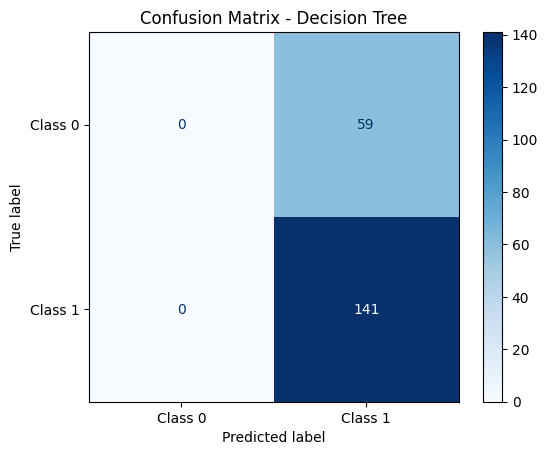

In [33]:
# Tahap 6: Visualisasi Confusion Matrix untuk Decision Tree
conf_matrix = confusion_matrix(y_test, dt_y_pred)  # Membuat confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')  # Plotting confusion matrix
plt.title('Confusion Matrix - Decision Tree')
plt.show()

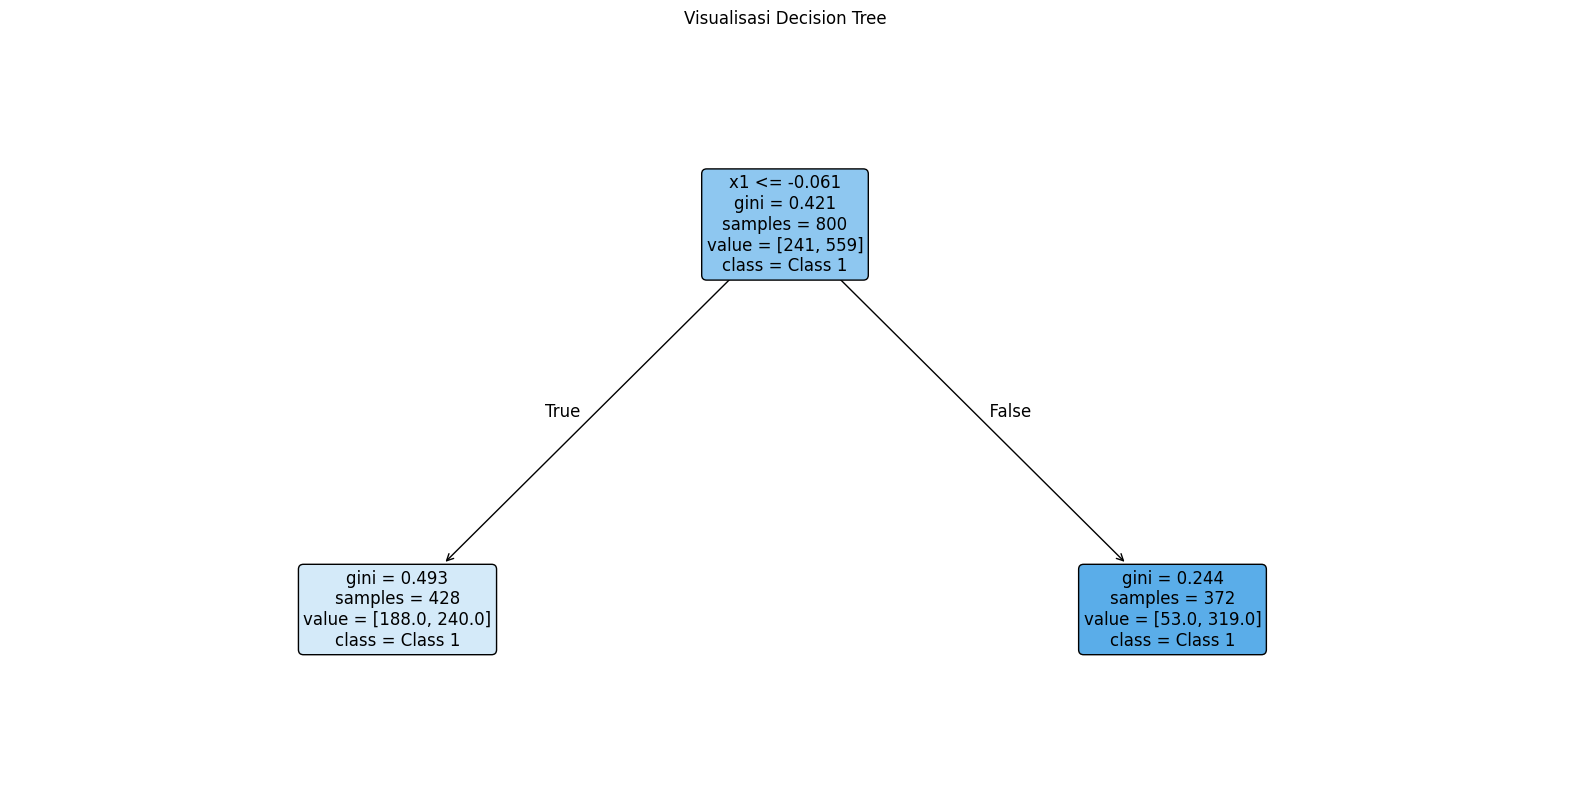

In [34]:
# Tahap 7: Visualisasi Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=df.columns[:-1],
    class_names=['Class 0', 'Class 1'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title('Visualisasi Decision Tree')
plt.show()

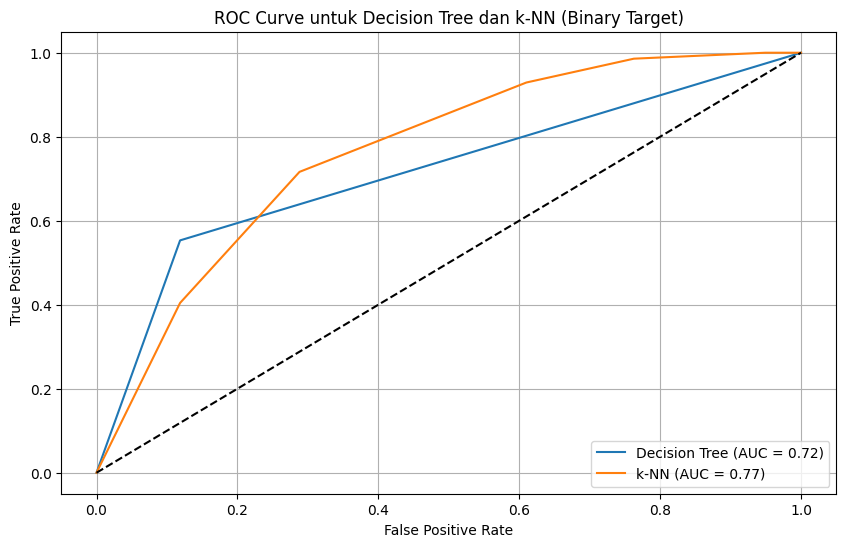

In [35]:
# Tahap 8: Visualisasi ROC Curve untuk kedua model
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])  # ROC untuk Decision Tree
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])  # ROC untuk k-NN

# Plotting ROC curve untuk kedua model
plt.figure(figsize=(10, 6))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.2f})'.format(dt_roc_auc))
plt.plot(knn_fpr, knn_tpr, label='k-NN (AUC = {:.2f})'.format(knn_roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal sebagai baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve untuk Decision Tree dan k-NN (Binary Target)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [36]:
# Tahap 9: Menyusun hasil evaluasi ke dalam DataFrame untuk perbandingan
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC'],
    'Decision Tree': [dt_accuracy, dt_precision, dt_recall, dt_f1, dt_roc_auc],
    'k-NN': [knn_accuracy, knn_precision, knn_recall, knn_f1, knn_roc_auc]
})

# Menampilkan hasil evaluasi
print("\nHasil Evaluasi Model:")
print(results_df)


Hasil Evaluasi Model:
      Metric  Decision Tree      k-NN
0   Accuracy       0.705000  0.770000
1  Precision       0.497025  0.758630
2     Recall       0.705000  0.770000
3   F1-score       0.583021  0.747208
4    ROC AUC       0.717274  0.765897
